In [2]:
### Importing the basic Libraries
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [3]:
### Importing the dataset 
df =pd.read_csv(r'C:\Users\DELL\Downloads\weatherAUS.csv')
df.sample(5) ### Checking the dataset 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
306,2009-10-03,Albury,8.5,13.5,3.2,NaN,NaN,SSE,31.0,ESE,...,87.0,75.0,1014.0,1015.1,7.0,7.0,9.6,13.0,Yes,Yes
835,2011-03-16,Albury,17.1,28.2,0.4,NaN,NaN,SW,30.0,E,...,87.0,37.0,1017.3,1015.5,7.0,NaN,19.8,28.0,No,No
1674,2013-11-12,Newcastle,14.7,21.8,2.8,NaN,NaN,NaN,NaN,NaN,...,82.0,95.0,NaN,NaN,8.0,6.0,19.9,18.5,Yes,Yes
6180,2011-02-20,Brisbane,22.1,35.3,0.0,3.6,12.3,ENE,20.0,WSW,...,55.0,51.0,1011.9,1007.3,0.0,1.0,28.7,33.6,No,No
1929,2014-07-25,Newcastle,7.0,17.2,0.2,NaN,NaN,NaN,NaN,NaN,...,96.0,82.0,NaN,NaN,7.0,8.0,10.8,15.5,No,Yes


In [4]:
### Checking the dataset shape
df.shape

(8425, 23)

In [5]:
### Checking the null values 
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

### All column has null values expect two columns which is Date Location. I will deal with these column with simpleImputer to fill the values.

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
### Importing the simple imputer 
from sklearn.impute import SimpleImputer
s_i = SimpleImputer(strategy = 'mean')
#s_i = s_i.fit(df[['MinTemp','MaxTemp','Rainfall','Evaporation','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3am','WindSpeed9am','WindSpeed3am','Humidity9am','Humidity3am','Pressure9am','Pressure3am','Temp9am','Temp3am','Cloud9am','Cloud3am']])
df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','WindSpeed9am','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Cloud9am','Cloud3pm']] = s_i.fit_transform(df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','WindSpeed9am','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Cloud9am','Cloud3pm']])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [8]:
### As the Date column not has any relation with target. So, I will drop this column 
df.drop(columns="Date", inplace=True)

In [9]:
df.isnull().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [10]:
### Importing the simple imputer 
from sklearn.impute import SimpleImputer
s_i = SimpleImputer(strategy = 'most_frequent')
col = ['WindGustDir','WindDir3pm','WindDir9am','RainToday','RainTomorrow']
df[col] = s_i.fit_transform(df[col])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [11]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### All the null values is filled and proceeding toward EDA but before moving to the EDA first change the categorical values into the integer.

In [12]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
col=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow']
df[col]= df[col].apply(le.fit_transform)

In [14]:
df.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object

## EAD and model building for Rainfall

In [15]:
### Importing the basic visualization matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

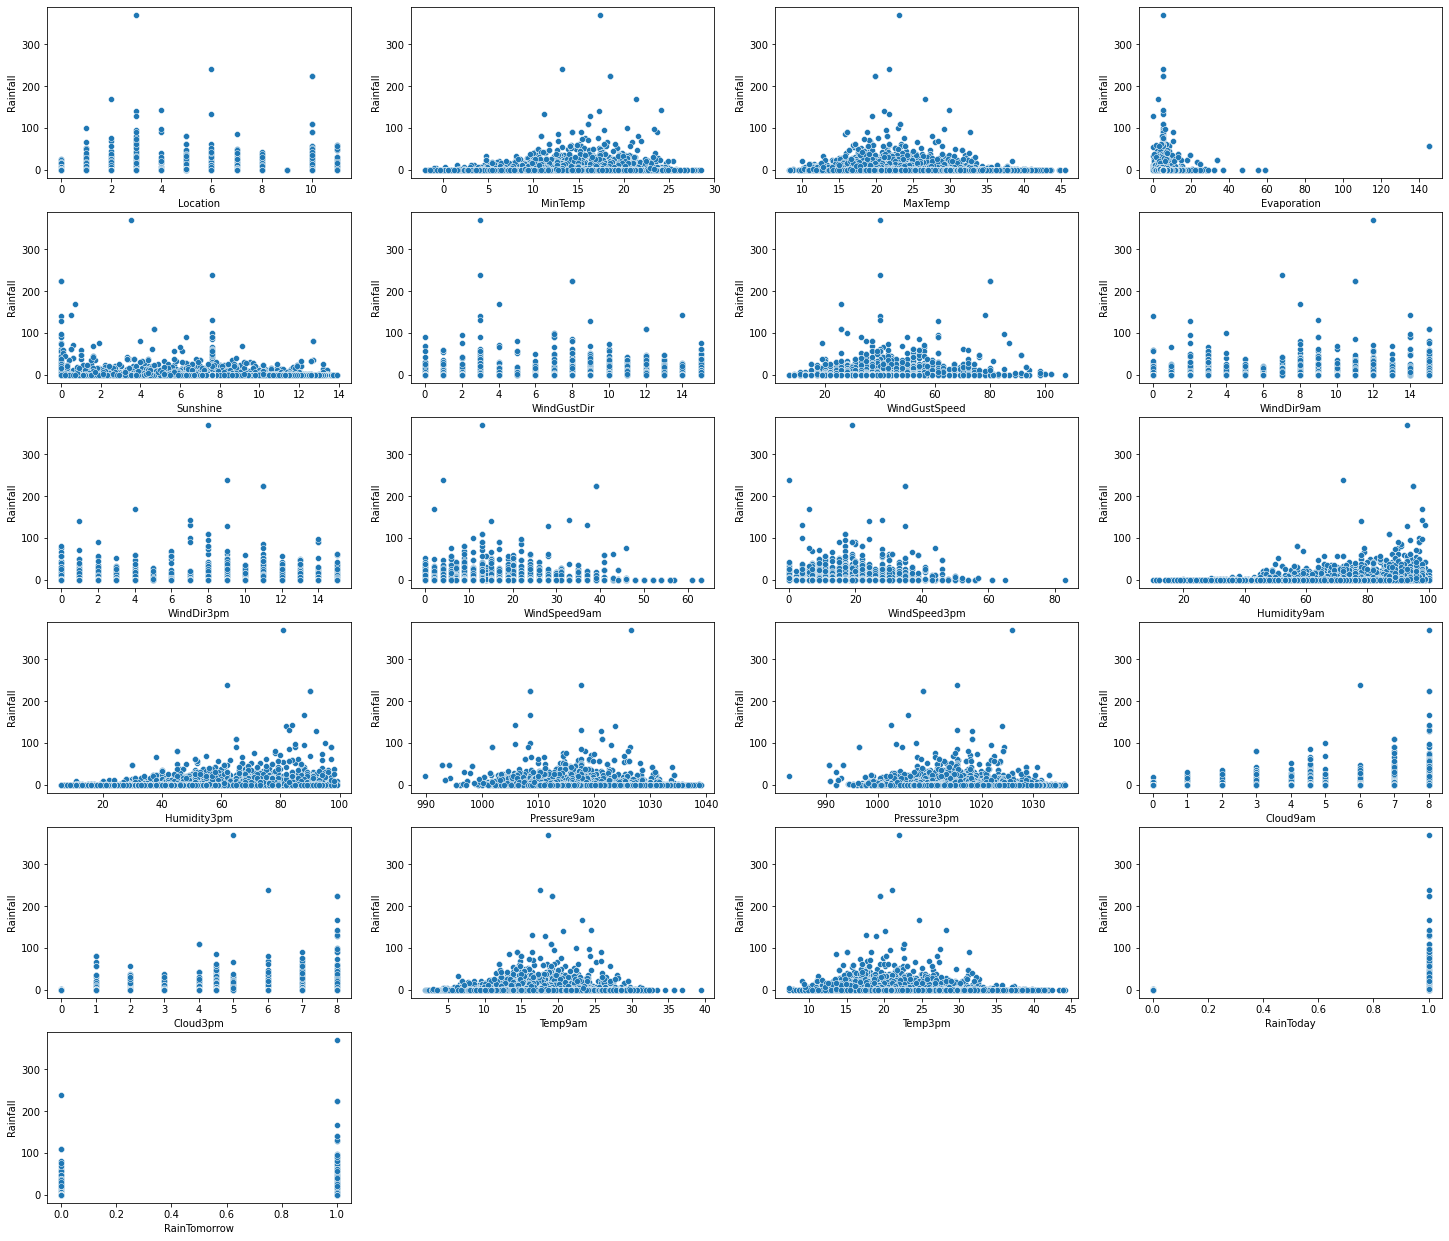

In [16]:
#### Plotting scatterplot to check the trend between features and target
x=df.drop(columns='Rainfall')
y=df['Rainfall']
plt.figure(figsize=(25,22))
pn=1
for column in x:
    if pn <= 22:
        plt.subplot(6,4, pn)
        sns.scatterplot(x[column],y )
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

### Conclusion - 

#### MinTemp has strong trend with target Rainfall.
#### MaxTemp has strong trend with target Rainfall, the amount of rainfall increased as the temperature rises.
#### Evaporation lies between 0-40 and effect the rainfall amount strongly.
#### Sunshine has strong trend with target Rainfall.
#### Widspeed has good relation with rainfall as the wind speed increase it has trend with target Rainfall.
#### Humidity has very good trend with target Rainfall in morning as well as afternoon.
#### Temperature is also has strong trend with target Rainfall.

### All feature has very good realtion with target. 

### Stats of the dataset

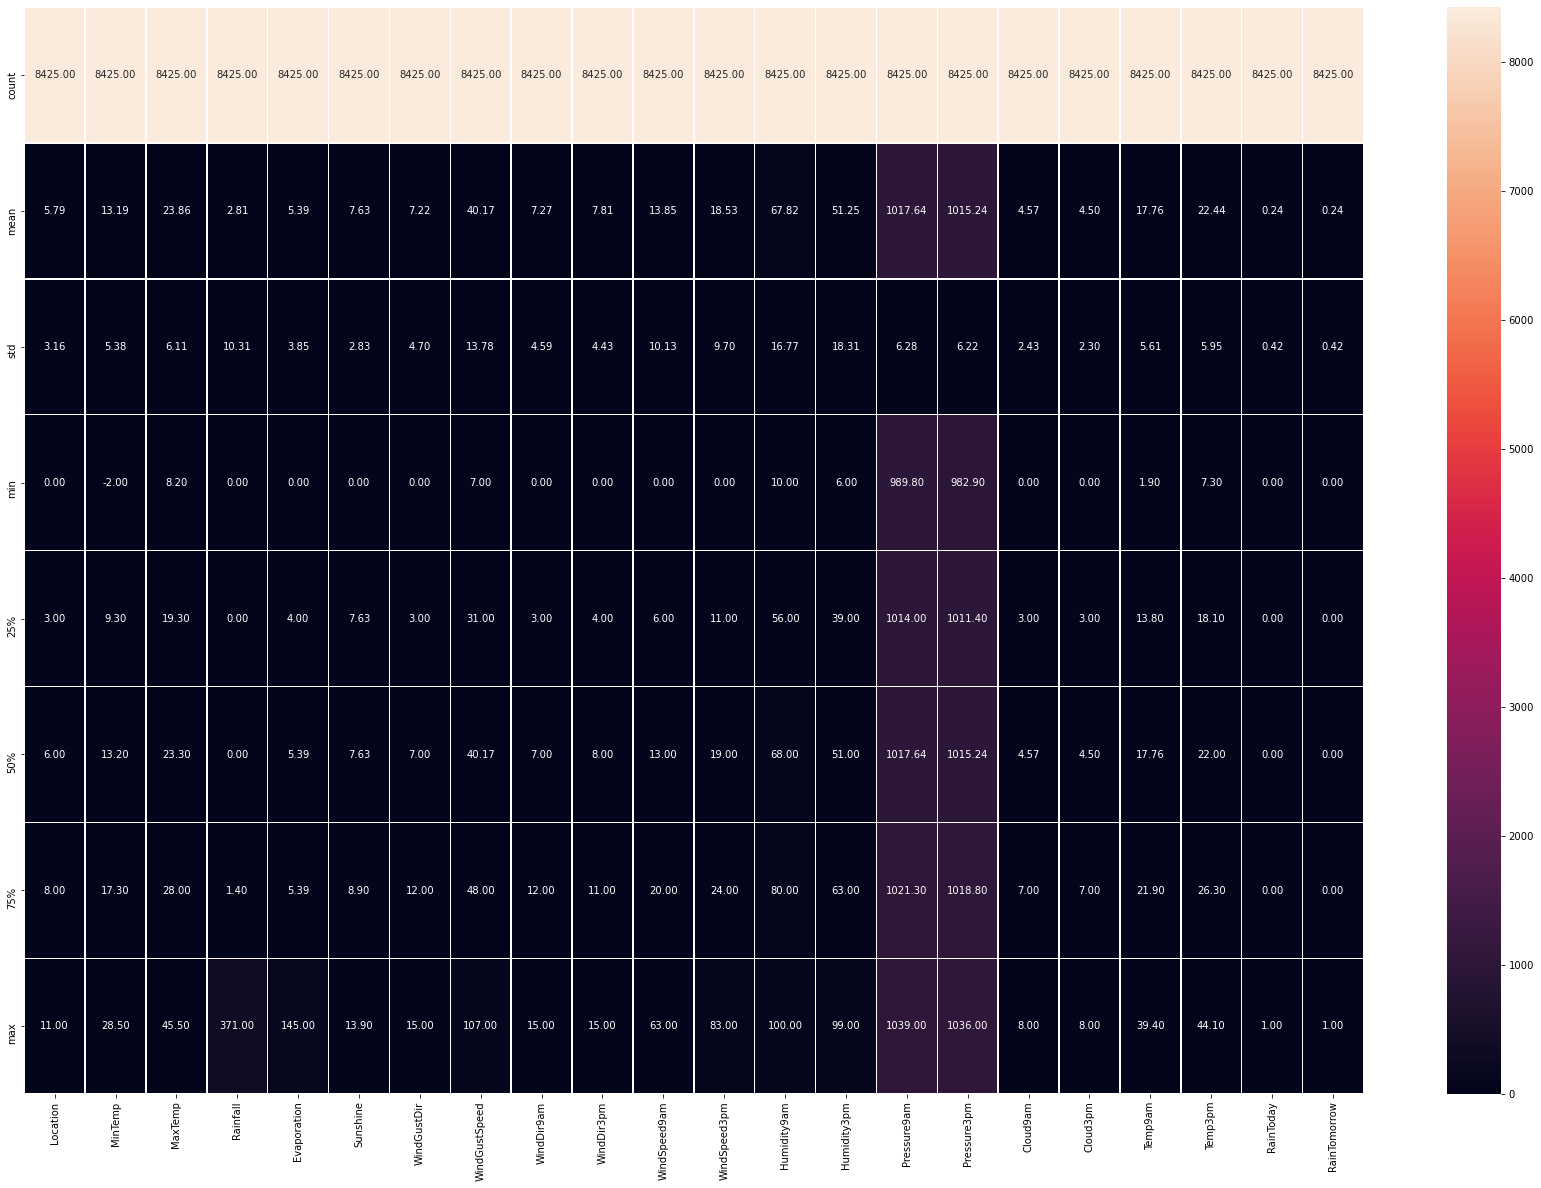

In [17]:
plt.figure(figsize=(30,20))
sns.heatmap(df.describe(), annot=True, fmt=".2f", linewidths=0.5)
plt.show()

### The heatmap is so hard to understand. Lets perform the simple describe

In [18]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,13.193305,23.859976,2.805913,5.389395,7.632205,7.217804,40.174469,7.267418,7.810445,...,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,0.236202,0.236320
std,3.162654,5.379488,6.114516,10.309308,3.852004,2.825451,4.702616,13.776101,4.588045,4.430162,...,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,0.424773,0.424846
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,3.000000,9.300000,19.300000,0.000000,4.000000,7.632205,3.000000,31.000000,3.000000,4.000000,...,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000
50%,6.000000,13.200000,23.300000,0.000000,5.389395,7.632205,7.000000,40.174469,7.000000,8.000000,...,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,0.000000
75%,8.000000,17.300000,28.000000,1.400000,5.389395,8.900000,12.000000,48.000000,12.000000,11.000000,...,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,...,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


### All the stats seems good to go. 

## Multicolinearity

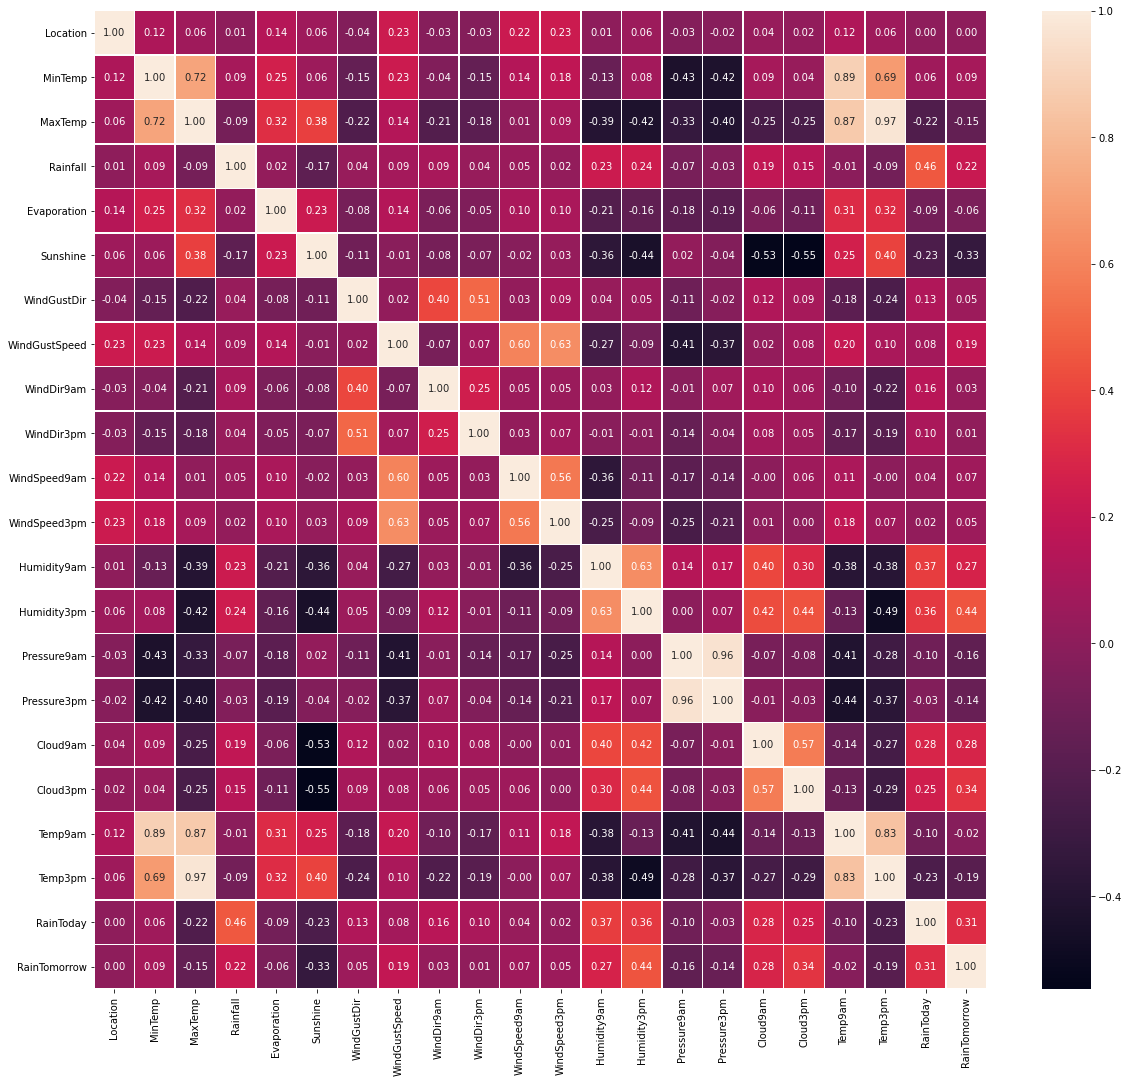

In [19]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.5)
plt.show()

### Most of feature which with different time has Multicolinearity but has different impact on target. So I will keep all the features for model building.


### Feature with maximum realtion with traget - RainToday(46%)
### Feature with minimum realtion with traget - Location(1%)

### Checking the distribution of the values in dataset

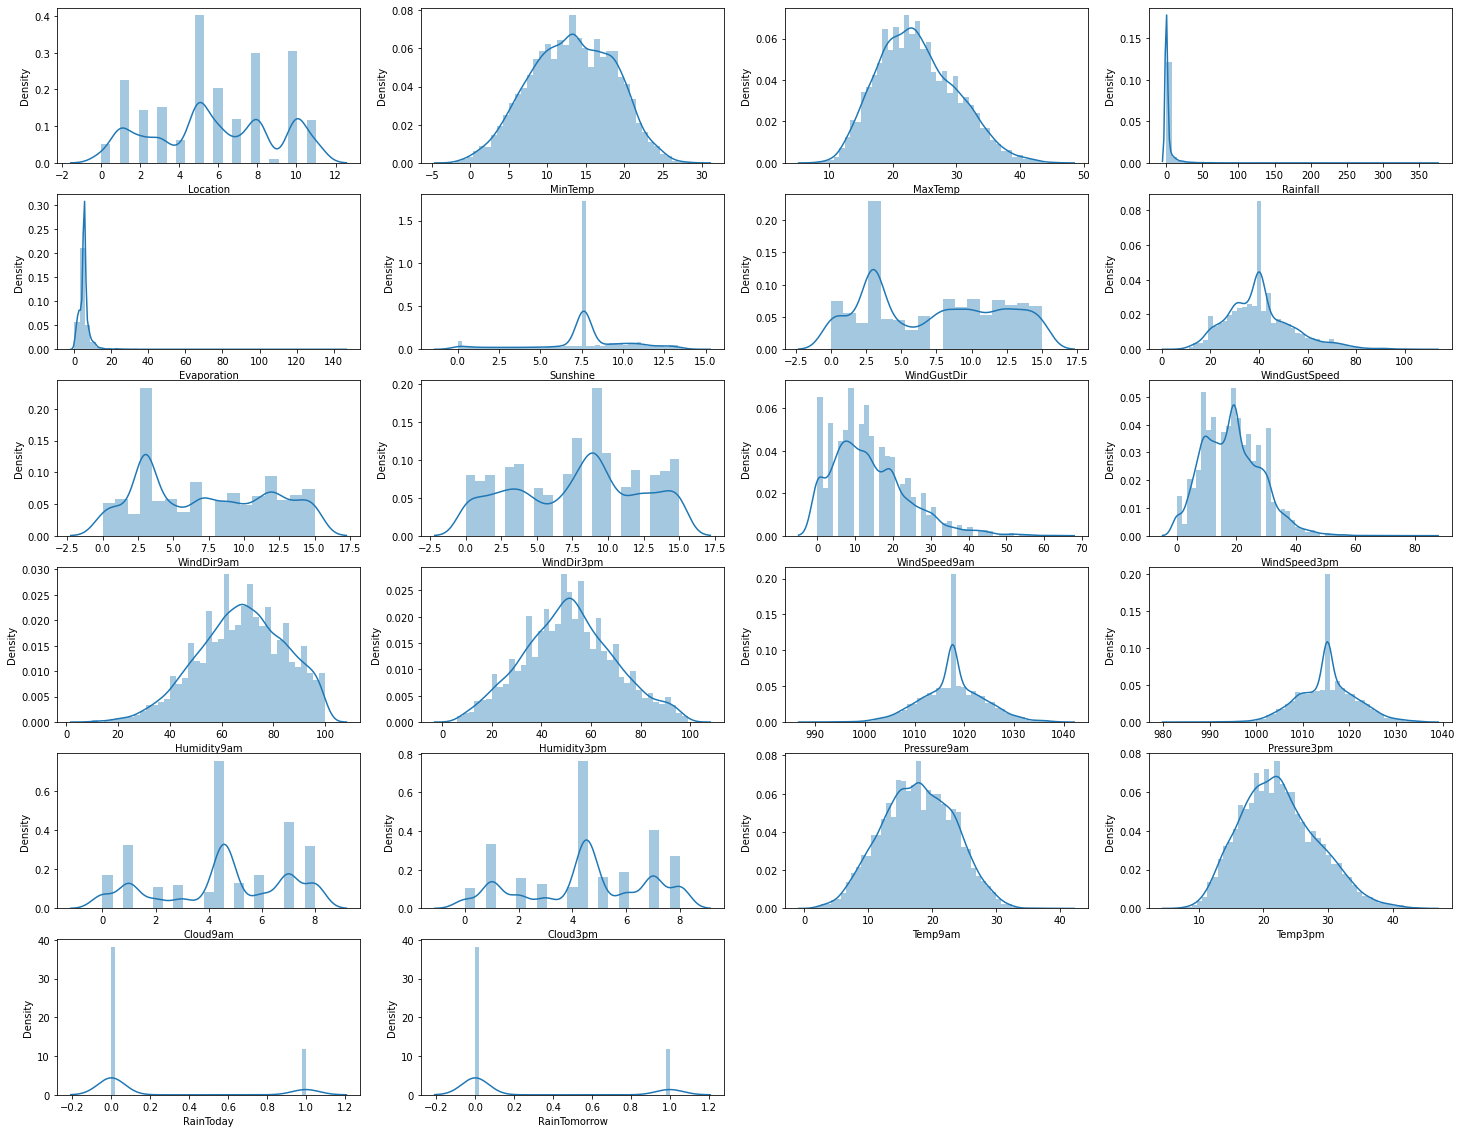

In [20]:
plt.figure(figsize=(25,20))
pn=1
for column in df:
    if pn <= 22:
        plt.subplot(6,4, pn)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

### Conclusion -

#### MinTemp has good value disctrution 
#### MaxTemp also has good value distribution. 
#### Rainfall has normal distribution but right skewed.
#### Evaporation has normal distribution but right skewed
#### Sunshine distribution is both side skewed
#### Humidity9am has normal value disctribution but left skewes.
#### Humidity3pm  has good distribution of values.
### Pressure9am has good distribution of values.
#### Pressure3pm has normal value distribution.
#### Temp9am has very good values distribution.
#### Temp3pm has very good values distribution

### All the feature has good value distribution.

In [21]:
### Checking the skewness
df.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

### There are most of the feature has skewness and I will keep the thresold value +-0.5 and try to remove maximum skewness with power transformer

In [22]:
from sklearn.preprocessing import power_transform
df_new = power_transform(df)
df=pd.DataFrame(df_new, columns=df.columns)
df.skew()

Location        -0.186657
MinTemp         -0.102983
MaxTemp         -0.010591
Rainfall         0.904387
Evaporation      0.080305
Sunshine        -0.075544
WindGustDir     -0.187177
WindGustSpeed    0.010481
WindDir9am      -0.155025
WindDir3pm      -0.248689
WindSpeed9am    -0.079333
WindSpeed3pm    -0.037553
Humidity9am     -0.067235
Humidity3pm     -0.038753
Pressure9am      0.002514
Pressure3pm      0.001772
Cloud9am        -0.282006
Cloud3pm        -0.220610
Temp9am         -0.048994
Temp3pm         -0.009893
RainToday        1.242362
RainTomorrow     1.241588
dtype: float64

### Skewness of the column is removed except the categorical values.

### Checking the outliers.

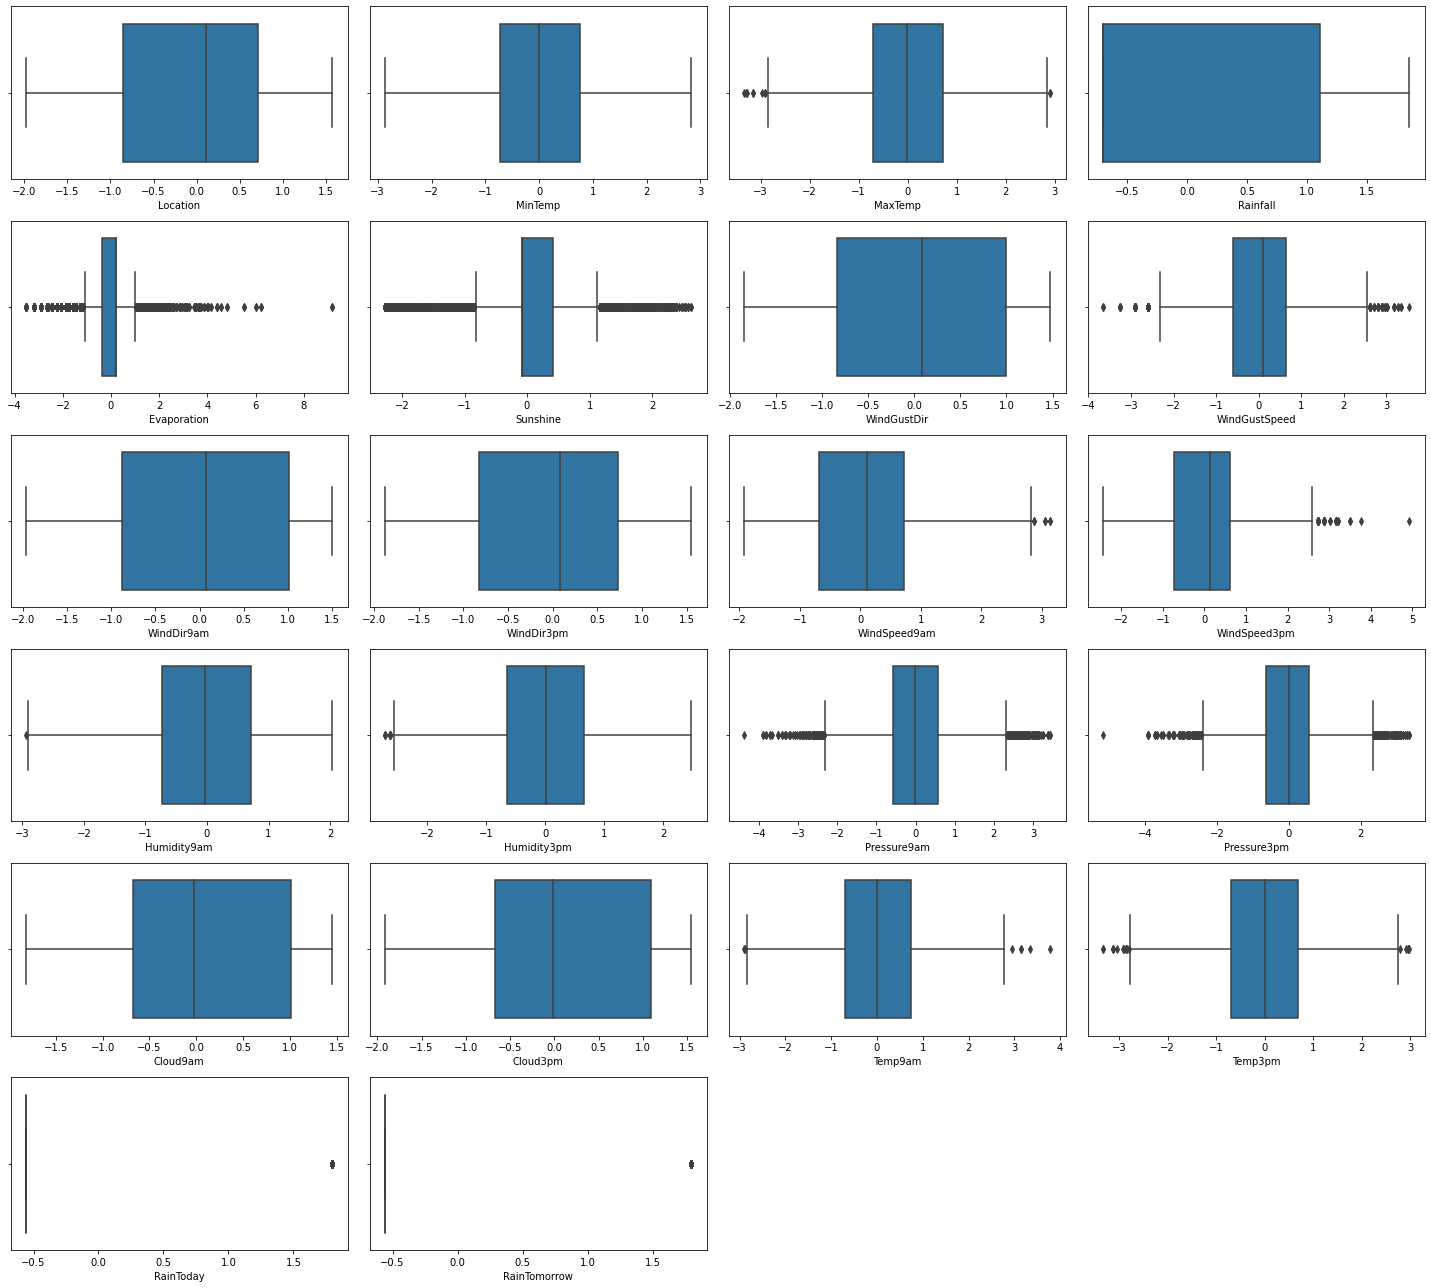

In [23]:
plt.figure(figsize=(20,18))
pn = 1
for column in df:
    if pn <= 22:
        ax = plt.subplot(6,4, pn)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=10)
    pn+=1
plt.tight_layout()

### Those column which has continuous values has the outliers. I will remove this outlier with zscore.

In [24]:
df.shape

(8425, 22)

In [25]:
## Importing the z-score and apply to the data set.
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
np.where(z<3)

(array([   0,    0,    0, ..., 8424, 8424, 8424], dtype=int64),
 array([ 0,  1,  2, ..., 19, 20, 21], dtype=int64))

In [26]:
df_new = df[(z<3).all(axis=1)]
df_new.shape

(8193, 22)

In [27]:
### Dataloss
data_loss= (8425-8187)/8425*100
print("Data loss of the dataset", data_loss)

Data loss of the dataset 2.8249258160237387


### The dataloss is 2.8 % which is acceptable.

### The dataset is now ready to proceed to build the model. Proceeding forward and building splitting the feature and target.

In [28]:
x= df_new.drop(columns="Rainfall")
y=df_new["Rainfall"]

In [29]:
### Scaling the features with standard scaler 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [30]:
#### Splitting the dataset into traing data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20, random_state=25)
print(len(x_train), len(y_train), len(x_test), len(y_test))

6554 6554 1639 1639


In [31]:
### Importing the libraries for model building.
from sklearn.metrics import r2_score, plot_roc_curve, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [32]:
### Importing the LinearRegression and checking the r2 score, cross validation and errors
lr= LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
r2_lr =r2_score(y_test,pred_lr)
scr = cross_val_score(lr, x,y, cv=5)
Corss_lr = scr.mean()
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("\t\t\t LinearRegression Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for LinearRegression model', r2_lr*100, '\n Cross Validation score ', Corss_lr*100, '\nMean_absolute_error', mae_lr,"\nMean_squared_error", mse_lr, '\nRoot mean_squared_error', rmse_lr )

			 LinearRegression Model Accuracy and r2 score, cross validation and errors 

R2 score for LinearRegression model 83.5802911963066 
 Cross Validation score  80.0863731878343 
Mean_absolute_error 0.27083296275598934 
Mean_squared_error 0.16642459319609673 
Root mean_squared_error 0.40795170448975543


In [33]:
### Importing the GradientBoostingRegressor and checking the r2 score, cross validation and errors
gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
r2_gbr =r2_score(y_test,pred_gbr)
scr = cross_val_score(gbr, x,y, cv=5)
Corss_gbr = scr.mean()
mae_gbr = mean_absolute_error(y_test,pred_gbr)
mse_gbr= mean_squared_error(y_test,pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
print("\t\t\t GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for GradientBoostingRegressor model', r2_gbr*100, '\n Cross Validation score ', Corss_gbr*100, '\nMean_absolute_error', mae_gbr,"\nMean_squared_error", mse_gbr, '\nRoot mean_squared_error', rmse_gbr )

			 GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for GradientBoostingRegressor model 85.23777830356978 
 Cross Validation score  80.70050957832835 
Mean_absolute_error 0.2507675543608036 
Mean_squared_error 0.14962486666915614 
Root mean_squared_error 0.38681373640184513


In [34]:
### Importing the KNeighborsRegressor and checking the score and r2 score
KNN= KNeighborsRegressor()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
r2_KNN =r2_score(y_test,pred_KNN)
scr = cross_val_score(KNN, x_scaled,y, cv=5)
Corss_KNN = scr.mean()
mae_KNN = mean_absolute_error(y_test,pred_KNN)
mse_KNN = mean_squared_error(y_test,pred_KNN)
rmse_KNN = np.sqrt(mse_KNN)

print("\t\t\t KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for KNeighborsRegressor model', r2_KNN*100, '\n Cross Validation score ', Corss_KNN*100, '\nMean_absolute_error', mae_KNN,"\nMean_squared_error", mse_KNN, '\nRoot mean_squared_error', rmse_KNN)

			 KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for KNeighborsRegressor model 79.9923466314225 
 Cross Validation score  75.21535649006171 
Mean_absolute_error 0.25538271921890954 
Mean_squared_error 0.20279078103535175 
Root mean_squared_error 0.45032297413673195


In [35]:
### Importing the BayesianRidge and checking the score and r2 score
br= BayesianRidge()
br.fit(x_train,y_train)
pred_br=br.predict(x_test)
r2_br =r2_score(y_test,pred_br)
scr = cross_val_score(br, x,y, cv=5)
Corss_br = scr.mean()
mae_br = mean_absolute_error(y_test,pred_br)
mse_br= mean_squared_error(y_test,pred_br)
rmse_br= np.sqrt(mse_br)

print("\t\t\t BayesianRidge Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for BayesianRidge model', r2_br*100, '\n Cross Validation score ', Corss_br*100, '\nMean_absolute_error', mae_br,"\nMean_squared_error", mse_br, '\nRoot mean_squared_error', rmse_br)

			 BayesianRidge Model Accuracy and r2 score, cross validation and errors 

R2 score for BayesianRidge model 83.58101031452652 
 Cross Validation score  80.08729163712746 
Mean_absolute_error 0.2709820305180298 
Mean_squared_error 0.16641730445799305 
Root mean_squared_error 0.4079427710574034


In [36]:
### Importing the SupportVectorRegressor and checking the score and r2 score
svr= SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
r2_svr=r2_score(y_test,pred_svr)
scr = cross_val_score(svr, x_scaled,y, cv=5)
Corss_svr = scr.mean()
mae_svr = mean_absolute_error(y_test,pred_svr)
mse_svr = mean_squared_error(y_test,pred_svr)
rmse_svr = np.sqrt(mse_svr)
print("\t\t\t SupportVectorRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for SupportVectorRegressor model', r2_svr*100, '\n Cross Validation score -', Corss_svr*100, '\nMean_absolute_error', mae_svr,"\nMean_squared_error", mse_svr, '\nRoot mean_squared_error', rmse_svr)

			 SupportVectorRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for SupportVectorRegressor model 84.91786126642822 
 Cross Validation score - 79.50588920095825 
Mean_absolute_error 0.2118936378884333 
Mean_squared_error 0.15286743713123457 
Root mean_squared_error 0.3909826557933671


In [37]:
### Importing the RandomForestRegressor and checking the score and r2 score
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
r2_RFR =r2_score(y_test,pred_RFR)
scr = cross_val_score(RFR, x_scaled,y, cv=5)
Corss_RFR = scr.mean()
mae_RFR = mean_absolute_error(y_test,pred_RFR)
mse_RFR = mean_squared_error(y_test,pred_RFR)
rmse_RFR = np.sqrt(mse_RFR)

print("\t\t\t RandomForestRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for RandomForestRegressor model', r2_RFR*100, '\n Cross Validation score ', Corss_RFR*100, '\nMean_absolute_error', mae_RFR,"\nMean_squared_error", mse_RFR, '\nRoot mean_squared_error', rmse_RFR )

			 RandomForestRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for RandomForestRegressor model 90.2631312675728 
 Cross Validation score  83.38154060438634 
Mean_absolute_error 0.1974969721998618 
Mean_squared_error 0.09868959536197687 
Root mean_squared_error 0.31414900184781247


### I performed 6 model prediction Model Accuracy and r2 score, cross validation and errors are mentioned below - 

#### Accuracy score and cross validation score for LinearRegression model 71.71 and cross validation score is 69.69 
#### Accuracy score cross validation score for GradientBoostingRegressor model 74.56 and cross validation score is 70.87  
#### Accuracy score cross validation score for RandomForestRegressor model 81.80 and cross validation score is 75.67
#### Accuracy score cross validation score  for BayesianRidge model 71.71 and cross validation score is 69.69  
#### Accuracy score cross validation score for KNeighborsRegressor model 69.05 and cross validation score is 64.40 
#### Accuracy score cross validation score  for SupportVectorRegressor model 72.90 and cross validation score is 68.93  

### From the above, I conclude that LinearRegression is giving good result as compared to other 6 model and RandomForestRegressor is also performing very good but their R2 score is more than accuracy. So, I will do hyperparameter tunning for both model and lets see what I will get.


In [38]:
### Importing the GridsearchCV
from sklearn.model_selection import GridSearchCV
rr = RandomForestRegressor()
para = {'n_estimators':range(1,5),
       'criterion':["mse", "mae"],
        'max_depth':range(1,6),
    'min_samples_split':range(1,5),
    'min_samples_leaf':range(1,10)}
grid =  GridSearchCV(rr, param_grid=para)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(1, 6),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 5),
                         'n_estimators': range(1, 5)})

In [39]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'n_estimators': 4}

In [40]:
### Importing the RandomForestRegressor and checking the score and r2 score
rr = RandomForestRegressor(criterion='mse',max_depth= 30, min_samples_leaf= 20,min_samples_split=15,n_estimators=100)
rr.fit(x_train,y_train)
pred_rr=rr.predict(x_test)
r2_rr=r2_score(y_test,pred_rr)
scr = cross_val_score(rr, x,y, cv=5)
Corss_rr = scr.mean()
mae_rr= mean_absolute_error(y_test,pred_rr)
mse_rr= mean_squared_error(y_test,pred_rr)
rmse_rr= np.sqrt(mse_rr)

print("\t\t\t RandomForestRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for RandomForestRegressor model', r2_rr*100, '\n Cross Validation score ', Corss_rr*100, '\nMean_absolute_error', mae_rr,"\nMean_squared_error", mse_rr, '\nRoot mean_squared_error', rmse_rr )

			 RandomForestRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for RandomForestRegressor model 85.75880537309769 
 Cross Validation score  80.83851100798623 
Mean_absolute_error 0.24679795186195436 
Mean_squared_error 0.1443439132048151 
Root mean_squared_error 0.37992619441783043


### Conclusion - I tried to to tune the parameter of the RandomForestRegressor but did not get better difference between accuracy and R2-Score. The LinearRegression model is giving best accuracy score and low difference between Accuracy and r2- score. I will go forward with LinearRegression model.

### Saving the model 

In [41]:
import joblib
joblib.dump(lr, 'weatherAUS_rainfall')

['weatherAUS_rainfall']

# Now I am going to predict RainToday

### As we are already did all data analysis. So, I will directly going to build the model.

In [150]:
### Importing the dataset again 
df =pd.read_csv(r'C:\Users\DELL\Downloads\weatherAUS.csv')

In [151]:
### Importing the simple imputer 
from sklearn.impute import SimpleImputer
s_i = SimpleImputer(strategy = 'mean')
#s_i = s_i.fit(df[['MinTemp','MaxTemp','Rainfall','Evaporation','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3am','WindSpeed9am','WindSpeed3am','Humidity9am','Humidity3am','Pressure9am','Pressure3am','Temp9am','Temp3am','Cloud9am','Cloud3am']])
df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','WindSpeed9am','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Cloud9am','Cloud3pm']] = s_i.fit_transform(df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','WindSpeed9am','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Cloud9am','Cloud3pm']])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [152]:
df.drop(columns='Date',inplace=True) ### Dropping the unnessary column

In [153]:
### Importing the simple imputer 
from sklearn.impute import SimpleImputer
s_i = SimpleImputer(strategy = 'most_frequent')
col = ['WindGustDir','WindDir3pm','WindDir9am','RainToday','RainTomorrow']
df[col] = s_i.fit_transform(df[col])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [154]:
### Importing the LabelEncoder and chage categorical values to the integer
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
col=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow']
df[col]= df[col].apply(le.fit_transform)

In [156]:
df.dtypes ### Checking the that values changed or not

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object

In [157]:
### Skewness 
df.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

In [158]:
### Some feature has skewness as before. So, I will remove this skewness with power transform
from sklearn.preprocessing import power_transform
df_new = power_transform(df)
df=pd.DataFrame(df_new, columns=df.columns)
df.skew()

Location        -0.186657
MinTemp         -0.102983
MaxTemp         -0.010591
Rainfall         0.904387
Evaporation      0.080305
Sunshine        -0.075544
WindGustDir     -0.187177
WindGustSpeed    0.010481
WindDir9am      -0.155025
WindDir3pm      -0.248689
WindSpeed9am    -0.079333
WindSpeed3pm    -0.037553
Humidity9am     -0.067235
Humidity3pm     -0.038753
Pressure9am      0.002514
Pressure3pm      0.001772
Cloud9am        -0.282006
Cloud3pm        -0.220610
Temp9am         -0.048994
Temp3pm         -0.009893
RainToday        1.242362
RainTomorrow     1.241588
dtype: float64

### Cheking the outliers.

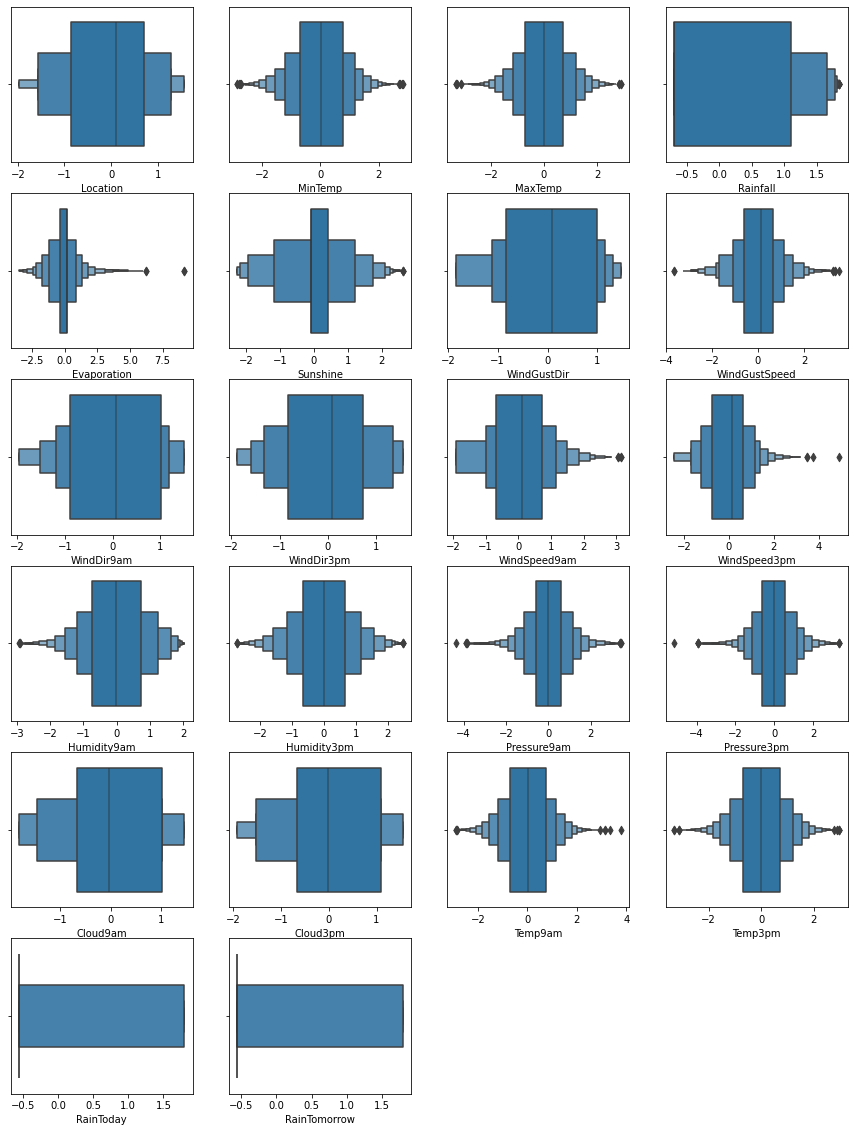

In [159]:
#### Plotting Boxplot to check the outliers
plt.figure(figsize=(15,20))
pn=1
for column in df:
    if pn <= 22:
        plt.subplot(6,4, pn)
        sns.boxenplot(df[column])
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

### There are some column has very less outliers but I will remove the outliers

In [160]:
df.shape

(8425, 22)

In [161]:
## Importing the z-score and apply to the data set.
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
np.where(z<3)

(array([   0,    0,    0, ..., 8424, 8424, 8424], dtype=int64),
 array([ 0,  1,  2, ..., 19, 20, 21], dtype=int64))

In [162]:
df_new = df[(z<3).all(axis=1)]
df_new.shape

(8193, 22)

In [164]:
### Dataloss
data_loss= (8425-8193)/8425*100
print("Data loss of the dataset", data_loss)

Data loss of the dataset 2.7537091988130564


In [165]:
### Changing the datatype as the classsifier will understand only integers.
df_new=df_new.astype(int)

### Dataset is ready for model building and now spliting the dataset into feature and target.

In [173]:
x_= df_new.drop(columns="RainToday")
y=df_new["RainToday"]

In [178]:
### Scaling the features with standard scaler 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x_rain)

In [179]:
#### Splitting the dataset into traing data and testing data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20, random_state=560)
print(len(x_train), len(y_train), len(x_test), len(y_test))

6554 6554 1639 1639


In [180]:
### Importing the model building libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


 LogisticRegression Model Accuracy  
Accuracy_score for LogisticRegression model 96.58328248932276 
 Cross Validation score is  95.17887779632746 
 Classification report is  
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1243
           1       0.88      0.99      0.93       396

    accuracy                           0.97      1639
   macro avg       0.94      0.98      0.96      1639
weighted avg       0.97      0.97      0.97      1639
 
 Confusion Metrix is 
 [[1197   46]
 [   2  394]]


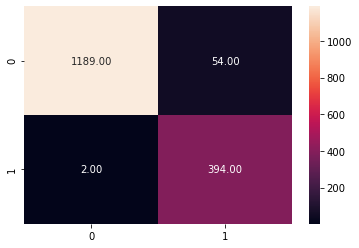

In [189]:
### Importing the LogisticRegression and checking the score and cross validation score 
lr= LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
acc_lr =accuracy_score(y_test,pred_lr)
scr = cross_val_score(lr, x,y, cv=5)
Clas_r = classification_report(y_test,pred_lr)
sns.heatmap(confusion_matrix(y_test,pred_lr), annot=True, fmt=".2f")
Corss_lr = scr.mean()

print("\n LogisticRegression Model Accuracy ",  '\nAccuracy_score for LogisticRegression model', acc_lr*100, "\n Cross Validation score is ",Corss_lr*100, '\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 RandomForestClassifier Model Accuracy 

Accuracy_score for RandomForestClassifier model 98.4136668700427 
 Cross Validation score is  99.20643860241177 
 Classification report is  
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1243
           1       0.88      0.99      0.93       396

    accuracy                           0.97      1639
   macro avg       0.94      0.98      0.96      1639
weighted avg       0.97      0.97      0.97      1639
 
 Confusion Metrix is 
 [[1220   23]
 [   3  393]]


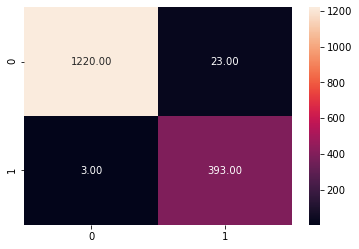

In [182]:
### Importing the RandomForestClassifier and  checking the score and cross validation score  
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
acc_RFC =accuracy_score(y_test,pred_RFC)
scr = cross_val_score(RFC, x,y, cv=5)
Corss_rfc = scr.mean()
sns.heatmap(confusion_matrix(y_test,pred_RFC), annot=True, fmt=".2f")
con = confusion_matrix(y_test,pred_RFC)

print("\n RandomForestClassifier Model Accuracy",  '\n\nAccuracy_score for RandomForestClassifier model', acc_RFC*100, "\n Cross Validation score is ",Corss_rfc*100, '\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 GaussianNB Model Accuracy 

Accuracy_score for GaussianNB model 96.58328248932276 
 Cross Validation score is  97.1438777479046 
 Classification report is  
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      1243
           1       0.88      1.00      0.93       396

    accuracy                           0.97      1639
   macro avg       0.94      0.98      0.96      1639
weighted avg       0.97      0.97      0.97      1639
 
 Confusion Metrix is 
 [[1220   23]
 [   3  393]]


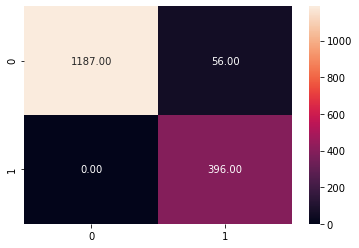

In [183]:
### Importing the GaussianNB and checking the score and cross validation score  
GB= GaussianNB()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
acc_GB =accuracy_score(y_test,pred_GB)
scr = cross_val_score(GB, x_scaled,y, cv=5)
Corss_GB = scr.mean()
Clas_r = classification_report(y_test,pred_GB)
sns.heatmap(confusion_matrix(y_test,pred_GB), annot=True, fmt=".2f")

print("\n GaussianNB Model Accuracy",  '\n\nAccuracy_score for GaussianNB model', acc_GB*100, "\n Cross Validation score is ",Corss_GB*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 GradientBoostingClassifier Model Accuracy 

Accuracy_score for GradientBoostingClassifier model 97.07138499084807 
 Cross Validation score is  97.16824562462148 
 Classification report is  
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      1243
           1       0.88      1.00      0.93       396

    accuracy                           0.97      1639
   macro avg       0.94      0.98      0.96      1639
weighted avg       0.97      0.97      0.97      1639
 
 Confusion Metrix is 
 [[1197   46]
 [   2  394]]


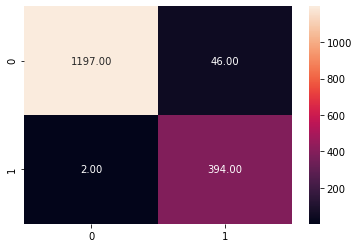

In [185]:
### Importing the GradientBoostingClassifier and checking the score and cross validation score
gbc= GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
acc_gbc =accuracy_score(y_test,pred_gbc)
scr = cross_val_score(gbc, x_scaled,y, cv=5)
Corss = scr.mean()
sns.heatmap(confusion_matrix(y_test,pred_gbc), annot=True, fmt=".2f")
con = confusion_matrix(y_test,pred_gbc)
print("\n GradientBoostingClassifier Model Accuracy",  '\n\nAccuracy_score for GradientBoostingClassifier model', acc_gbc*100,"\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 SVC Model Accuracy 

Accuracy_score for SVC model 96.88834655277608 
 Cross Validation score is  95.60589298844333 
 Classification report is  
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1243
           1       0.89      0.99      0.94       396

    accuracy                           0.97      1639
   macro avg       0.94      0.98      0.96      1639
weighted avg       0.97      0.97      0.97      1639
 
 Confusion Metrix is 
 [[1197   46]
 [   2  394]]


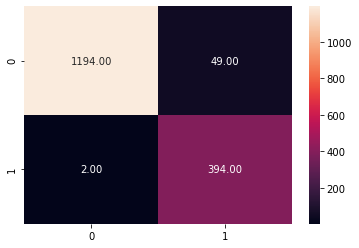

In [186]:
### Importing the SVC and checking the score and cross validation score
svc= SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
acc_svc =accuracy_score(y_test,pred_svc)
scr = cross_val_score(svc, x,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_svc)
sns.heatmap(confusion_matrix(y_test,pred_svc), annot=True, fmt=".2f")
print("\n SVC Model Accuracy",  '\n\nAccuracy_score for SVC model', acc_svc*100,"\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 KNeighborsClassifier Model Accuracy 

Accuracy_score for KNeighborsClassifier model 96.27821842586943 
 Cross Validation score is  95.54482802804951 
 Classification report is  
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1243
           1       0.91      0.94      0.92       396

    accuracy                           0.96      1639
   macro avg       0.95      0.95      0.95      1639
weighted avg       0.96      0.96      0.96      1639
 
 Confusion Metrix is 
 [[1197   46]
 [   2  394]]


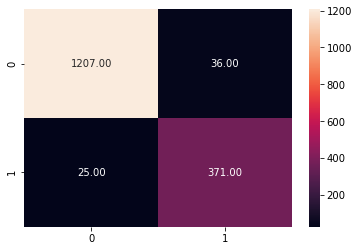

In [187]:
### Importing the KNeighborsClassifier and checking the score and cross validation score 
KNC= KNeighborsClassifier()
KNC.fit(x_train,y_train)
pred_KNC=KNC.predict(x_test)
acc_KNC =accuracy_score(y_test,pred_KNC)
scr = cross_val_score(KNC, x_scaled,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_KNC)
sns.heatmap(confusion_matrix(y_test,pred_KNC), annot=True, fmt=".2f")
print("\n KNeighborsClassifier Model Accuracy",  '\n\nAccuracy_score for KNeighborsClassifier model', acc_KNC*100, "\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)

### I performed 6 model prediction Accuracy score, those score are mentioned below - 

#### Accuracy score and cross validation score for LogisticRegression model 96.58  and cross validation score is 95.17
#### Accuracy score cross validation score for RandomForestClassifier model 98.41 and cross validation score is 99.20
#### Accuracy score cross validation score for GaussianNB model 96.58 and cross validation score is 97.14
#### Accuracy score cross validation score for KNeighborsClassifier model 96.27  and cross validation score is 95.44
#### Accuracy score cross validation score  for SVC model 96.88 and cross validation score is 95.60
#### Accuracy score cross validation score  for GradientBoostingClassifier model 97.07 and cross validation score is 97.16

### From the above, I conclude that I will go forward with KNeighborsClassifier because the accuracy is good compariosn to other model and aslo has very low difference in Cross validation score but we can do better hyperparameter tuning with KNeighborsClassifier. May the Accuracy will increase.


In [190]:
from sklearn.model_selection import GridSearchCV
knc = KNeighborsClassifier()
para = {'n_neighbors':range(1,10),
       'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size':range(1,6)}
grid =  GridSearchCV(knc, param_grid=para)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 6),
                         'n_neighbors': range(1, 10)})

In [191]:
grid.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1}


 KNeighborsClassifier Model Accuracy 

Accuracy_score for KNeighborsClassifier model 95.54606467358145 
 Cross Validation score is  94.62938254884564 
 Classification report is  
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1243
           1       0.89      0.93      0.91       396

    accuracy                           0.96      1639
   macro avg       0.93      0.95      0.94      1639
weighted avg       0.96      0.96      0.96      1639
 
 Confusion Metrix is 
 [[1197   46]
 [   2  394]]


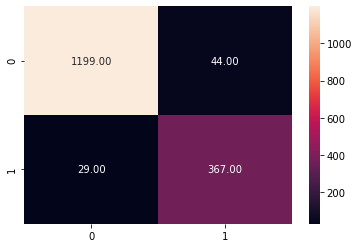

In [198]:
### Importing the KNeighborsClassifier and checking the score and cross validation score 
knc= KNeighborsClassifier(algorithm='kd_tree', leaf_size= 1, n_neighbors= 3)
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)
acc_knc =accuracy_score(y_test,pred_knc)
scr = cross_val_score(knc, x_scaled,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_knc)
sns.heatmap(confusion_matrix(y_test,pred_knc), annot=True, fmt=".2f")
print("\n KNeighborsClassifier Model Accuracy",  '\n\nAccuracy_score for KNeighborsClassifier model', acc_knc*100, "\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)

## ROC

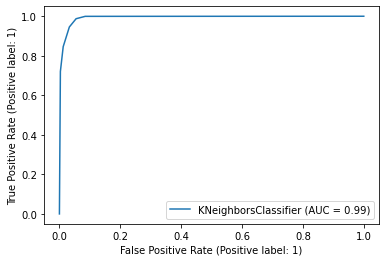

In [199]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(KNC,x,y)
plt.show()

### The ROC curve also shows very good accuracy which is 99%.

### Conclusion- I tried to increase the accuracy to tune hyperparameter but did not get. So, I will keep without tune KNeighborsClassifier model which has accuracy 96.27 and cross validation score is 95.44

## Saving the model

In [200]:
import joblib
joblib.dump(KNC, 'weatherAUS_RainToday')

['weatherAUS_RainToday']